# Data Acquisition

In [1]:
# Dependencies
import numpy as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
categories = [
    'Academic Interests',
    'Arts and Culture',
    'Automotive',
    'Books and Literature',
    'Business and Finance',
    'Careers',
    'Family and Relationships',
    'Food and Drink',
    'Health',
    'Healthy Living',
    'Hobbies and Interests',
    'Home and Garden',
    'Movies',
    'Music and Audio',
    'News and Politics',
    'Personal Finance',
    'Pets',
    'Pharmaceuticals, Conditions, and Symptoms',
    'Real Estate',
    'Shopping',
    'Sports',
    'Style & Fashion',
    'Technology & Computing',
    'Television',
    'Travel',
    'Video Gaming'
]

## Hugging Face Dataset

In [3]:
df1 = pd.read_csv("C:\\Users\\asus\\NLP\\Hugging Face Dataset\\train.csv")
df1.head(10)

,text,target
0,"48 Hours in Hudson, NY. In March of 2021, I to...",Events_and_Attractions
1,Musik zu machen liegt uns im Blut. Einfach Kra...,Personal_Finance
2,Roohi’s trailer is haunting and hilarious at t...,Family_and_Relationships
3,2012 PLAYBOY JAZZ FESTIVAL FEATURES NEW ARTIST...,Music_and_Audio
4,FedEx Office Coupons & Promo Codes. FedEx Offi...,Shopping
5,Selecting Words. 26) The Kumbh Mela is known f...,Technology___Computing
6,Sibley South. The wonderful Sibley Regional Vo...,Shopping
7,National Theatre: On Demand. In Schools. Natio...,Fine_Art
8,One Shot is Call of Duty: Advanced Warfare’s n...,Shopping
9,Pet Loss Books – Words Of Comfort From Pet Los...,Family_and_Relationships


In [4]:
not_needed1 = ['Events_and_Attractions', 'Religion']
df1 = df1[~df1['target'].isin(not_needed1)]
df1.head(10)

,text,target
1,Musik zu machen liegt uns im Blut. Einfach Kra...,Personal_Finance
2,Roohi’s trailer is haunting and hilarious at t...,Family_and_Relationships
3,2012 PLAYBOY JAZZ FESTIVAL FEATURES NEW ARTIST...,Music_and_Audio
4,FedEx Office Coupons & Promo Codes. FedEx Offi...,Shopping
5,Selecting Words. 26) The Kumbh Mela is known f...,Technology___Computing
6,Sibley South. The wonderful Sibley Regional Vo...,Shopping
7,National Theatre: On Demand. In Schools. Natio...,Fine_Art
8,One Shot is Call of Duty: Advanced Warfare’s n...,Shopping
9,Pet Loss Books – Words Of Comfort From Pet Los...,Family_and_Relationships
10,Store2Vec: DoorDash Recommendations with Mitch...,Technology___Computing


In [5]:
def fix_iab_category(category):
    category = re.sub(r'_{3}', ' and ', category)
    category = category.replace('_', ' ')

    return category

df1.target = df1.target.apply(fix_iab_category)
df1.head(10)

,text,target
1,Musik zu machen liegt uns im Blut. Einfach Kra...,Personal Finance
2,Roohi’s trailer is haunting and hilarious at t...,Family and Relationships
3,2012 PLAYBOY JAZZ FESTIVAL FEATURES NEW ARTIST...,Music and Audio
4,FedEx Office Coupons & Promo Codes. FedEx Offi...,Shopping
5,Selecting Words. 26) The Kumbh Mela is known f...,Technology and Computing
6,Sibley South. The wonderful Sibley Regional Vo...,Shopping
7,National Theatre: On Demand. In Schools. Natio...,Fine Art
8,One Shot is Call of Duty: Advanced Warfare’s n...,Shopping
9,Pet Loss Books – Words Of Comfort From Pet Los...,Family and Relationships
10,Store2Vec: DoorDash Recommendations with Mitch...,Technology and Computing


In [6]:
df1.target = df1.target.replace({'Fine Art': 'Arts and Culture', 'Pop Culture': 'Arts and Culture',
                                 'Medical Health': 'Health', 'Science':'Academic Interests'})

In [7]:
pd.unique(df1.target)

array(['Personal Finance', 'Family and Relationships', 'Music and Audio',
       'Shopping', 'Technology and Computing', 'Arts and Culture',
       'Business and Finance', 'Television', 'Healthy Living', 'Sports',
       'Style and Fashion', 'Travel', 'Automotive', 'Health',
       'Hobbies and Interests', 'Academic Interests', 'Pets', 'Careers',
       'News and Politics', 'Movies', 'Home and Garden', 'Real Estate',
       'Video Gaming'], dtype=object)

In [8]:
len(pd.unique(df1.target))

23

In [9]:
df1.shape

(4642, 2)

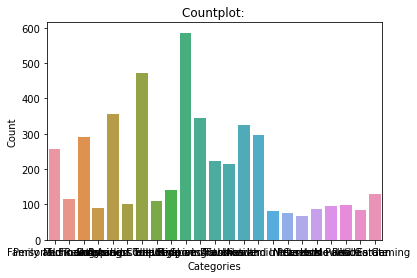

In [10]:
sns.countplot(x = 'target', data = df1)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Countplot: ')
plt.show()

In [11]:
df1.target.value_counts()

Sports                      586
Business and Finance        471
Technology and Computing    355
Style and Fashion           345
Health                      326
Hobbies and Interests       297
Music and Audio             290
Personal Finance            258
Travel                      224
Automotive                  214
Healthy Living              141
Video Gaming                130
Family and Relationships    115
Television                  109
Arts and Culture            100
Home and Garden              98
Movies                       96
Shopping                     90
News and Politics            86
Real Estate                  85
Academic Interests           82
Pets                         76
Careers                      68
Name: target, dtype: int64

#### Conclusion: Data is imbalanced and more data is needed

## Kaggle Dataset

In [12]:
df2 = pd.read_csv('training_data_en.csv')
df2.head(10)

C:\Users\asus\AppData\Local\Temp/ipykernel_12672/780063045.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('training_data_en.csv')


,target,text1,text2,text3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,/Travel,tourist scavenger hunt self guided walking tou...,explore the city with our 2-3 hour tourist sca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/Books & Literature,tween 2 teen book reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/Hobbies & Leisure/Outdoors/Hiking & Camping,planned spontaneity – a blog about hiking arou...,a blog about hiking around the midwest and beyond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Team Sports/,- soccerplayer.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Soccer,- soccerplayer.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/Sports/Team Sports/Soccer,- soccerplayer.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/Autos & Vehicles/Motor Vehicles (By Type)/Off...,utv accessories & parts | find the best side b...,find the right side by side accessories for yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/Business & Industrial/Construction & Maintena...,"tarps, large canvas tarp, & canvas tarp manufa...",debrovy's is the ideal tarp manufacturer in th...,tarp tarps and canvas baseball field tarps ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/Arts & Entertainment,perfectly disheveled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/Home & Garden/Home Furnishings,urban barn,furniture and accessories for your home and of...,urban barn,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
unnamed_columns = df2.columns[df2.columns.str.startswith('Unnamed:')]
df2 = df2.drop(columns=unnamed_columns)

In [14]:
df2.text1 = df2.text1.fillna('')
df2.text2 = df2.text2.fillna('')
df2.text3 = df2.text3.fillna('')

df2['text'] = df2['text1'] + " " + df2['text2'] + " " + df2['text3']

In [15]:
df2 = df2.drop(columns= ['text1', 'text2', 'text3'])

In [16]:
def create_target(inp):
    inp = str(inp)
    if inp[0] == '/':
        inp = inp[1:]
    res = inp.split('/')[0]
    return res

df2.target = df2.target.apply(create_target)
df2.head(10)

,target,text
0,Travel,tourist scavenger hunt self guided walking tou...
1,Books & Literature,tween 2 teen book reviews
2,Hobbies & Leisure,planned spontaneity – a blog about hiking arou...
3,Team Sports,- soccerplayer.net
4,Soccer,- soccerplayer.net
5,Sports,- soccerplayer.net
6,Autos & Vehicles,utv accessories & parts | find the best side b...
7,Business & Industrial,"tarps, large canvas tarp, & canvas tarp manufa..."
8,Arts & Entertainment,perfectly disheveled
9,Home & Garden,urban barn furniture and accessories for your ...


In [17]:
def fix_target(inp):
    inp = inp.replace("&", "and")
    return inp
df2.target = df2.target.apply(fix_target)

In [18]:
df2.head(10)

,target,text
0,Travel,tourist scavenger hunt self guided walking tou...
1,Books and Literature,tween 2 teen book reviews
2,Hobbies and Leisure,planned spontaneity – a blog about hiking arou...
3,Team Sports,- soccerplayer.net
4,Soccer,- soccerplayer.net
5,Sports,- soccerplayer.net
6,Autos and Vehicles,utv accessories & parts | find the best side b...
7,Business and Industrial,"tarps, large canvas tarp, & canvas tarp manufa..."
8,Arts and Entertainment,perfectly disheveled
9,Home and Garden,urban barn furniture and accessories for your ...


In [19]:
len(pd.unique(df2.target))

42

In [20]:
pd.unique(df2.target)

array(['Travel', 'Books and Literature', 'Hobbies and Leisure',
       'Team Sports', 'Soccer', 'Sports', 'Autos and Vehicles',
       'Business and Industrial', 'Arts and Entertainment',
       'Home and Garden', 'Online Communities', 'Science', 'Shopping',
       'People and Society', 'Law and Government', 'Reference',
       'Beauty and Fitness', 'Jobs and Education', 'Health',
       'Computers and Electronics', 'News', 'Games', 'Food and Drink',
       'Adult', 'Finance', 'Internet and Telecom', 'Real Estate',
       'Sensitive Subjects', 'Pets and Animals', 'nan',
       'Business and Consumer Services',
       'Computers Electronics and Technology', 'eCommerce and Shopping',
       'Science and Education', 'Vehicles', 'Reference Materials',
       'Travel and Tourism', 'Community and Society', 'Gambling',
       'Lifestyle', 'Heavy Industry and Engineering', 'Jobs and Career'],
      dtype=object)

In [21]:
df2.shape

(36256, 2)

In [22]:
not_needed2 = ['Soccer', 'Online Communities',
       'People and Society', 'Law and Government', 'Reference',
       'Adult','Internet and Telecom','Sensitive Subjects', 'nan', 'Reference Materials',
       'Community and Society', 'Gambling',
       'Heavy Industry and Engineering','Jobs and Education']

In [23]:
df2 = df2[~df2['target'].isin(not_needed2)]
df2.head(10)

,target,text
0,Travel,tourist scavenger hunt self guided walking tou...
1,Books and Literature,tween 2 teen book reviews
2,Hobbies and Leisure,planned spontaneity – a blog about hiking arou...
3,Team Sports,- soccerplayer.net
5,Sports,- soccerplayer.net
6,Autos and Vehicles,utv accessories & parts | find the best side b...
7,Business and Industrial,"tarps, large canvas tarp, & canvas tarp manufa..."
8,Arts and Entertainment,perfectly disheveled
9,Home and Garden,urban barn furniture and accessories for your ...
11,Hobbies and Leisure,"fishing directory website for listings, report..."


In [24]:
df2.shape

(26208, 2)

In [25]:
df2.target = df2.target.replace({'Fine Art': 'Arts and Culture', 'Pop Culture': 'Arts and Culture', 
                                 'Business and Industrial': 'Business and Finance', 'Business and Consumer Services': 'Business and Finance', 
                                 'Jobs and Career':'Careers', 'Autos and Vehicles':'Automotive', 'Vehicles':'Automotive', 
                                 'Science':'Academic Interests', 'Science and Education':'Academic Interests', 
                                 'Hobbies and Leisure': 'Hobbies and Interests', 'News':'News and Politics', 'Finance':'Personal Finance', 
                                 'eCommerce and Shopping': 'Shopping', 'Team Sports':'Sports', 'Beauty and Fitness':'Style and Fashion', 
                                 'Lifestyle':'Style and Fashion', 'Computers and Electronics':'Technology and Computing', 
                                 'Computers Electronics and Technology':'Technology and Computing', 'Travel and Tourism':'Travel', 
                                 'Pets and Animals':'Pets', 'Games':'Video Gaming'})

In [26]:
df2.target.value_counts()

Business and Finance        3725
Arts and Entertainment      3457
Shopping                    2805
Hobbies and Interests       2094
Technology and Computing    1818
Home and Garden             1645
Health                      1356
Sports                      1188
Food and Drink              1106
News and Politics           1103
Automotive                  1085
Style and Fashion            870
Video Gaming                 867
Travel                       867
Books and Literature         730
Personal Finance             606
Academic Interests           511
Real Estate                  298
Pets                          74
Careers                        3
Name: target, dtype: int64

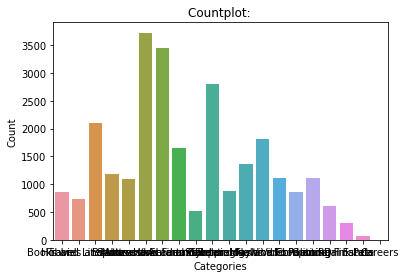

In [27]:
sns.countplot(x = 'target', data = df2)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Countplot: ')
plt.show()

#### Conclusion: Data is imbalanced and much more data is needed

### Hugging Face dataset 2

In [28]:
df3 = pd.read_csv('news_article_categorization.csv')
df3.head(10)

,article,headline,category
0,"Elon Musk, Amber Heard Something's Fishy On Wr...",Elon Musk and Amber Heard go on a sushi date a...,Entertainment
1,Scientists are developing more than 100 corona...,Scientists developing coronavirus vaccines usi...,World
2,Jared Fogle Shut Down By Judge In Bid for Earl...,Jared Fogle gets no love from judge who senten...,Entertainment
3,The agency had come under fire from members of...,F.D.A. cracks down on companies selling corona...,Health
4,"Credit...Jim Wilson/The New York TimesJune 30,...",Free speech has become a weapon of the powerfu...,Politics
5,"Before Coming Out, a Hard Time Growing UpVideo...","Michael Sam, NFL prospect who comes out, grew ...",Sports
6,Credit...Laurent Cipriani/Associated PressNov....,Russia's candidate for Interpol president has ...,World
7,"Fortnites parent company, Epic Games, had brok...",Apple does not need to reinstate Epic Games vi...,Tech
8,Lil Pump Attention Record Companies ... $15 Mi...,Lil Pump drops quarter mil on bling in New Yor...,Entertainment
9,The InterpreterCredit...Jean-Paul Pelissier/Re...,A European Union nuclear weapons program is ga...,World


In [29]:
df3['text'] = df3['headline'] + " " + df3['article']
df3 = df3.drop(columns = ['article', 'headline'])
df3.head(10)

,category,text
0,Entertainment,Elon Musk and Amber Heard go on a sushi date a...
1,World,Scientists developing coronavirus vaccines usi...
2,Entertainment,Jared Fogle gets no love from judge who senten...
3,Health,F.D.A. cracks down on companies selling corona...
4,Politics,Free speech has become a weapon of the powerfu...
5,Sports,"Michael Sam, NFL prospect who comes out, grew ..."
6,World,Russia's candidate for Interpol president has ...
7,Tech,Apple does not need to reinstate Epic Games vi...
8,Entertainment,Lil Pump drops quarter mil on bling in New Yor...
9,World,A European Union nuclear weapons program is ga...


In [30]:
df3.rename(columns={'category': 'target'}, inplace=True)
df3.head(10)

,target,text
0,Entertainment,Elon Musk and Amber Heard go on a sushi date a...
1,World,Scientists developing coronavirus vaccines usi...
2,Entertainment,Jared Fogle gets no love from judge who senten...
3,Health,F.D.A. cracks down on companies selling corona...
4,Politics,Free speech has become a weapon of the powerfu...
5,Sports,"Michael Sam, NFL prospect who comes out, grew ..."
6,World,Russia's candidate for Interpol president has ...
7,Tech,Apple does not need to reinstate Epic Games vi...
8,Entertainment,Lil Pump drops quarter mil on bling in New Yor...
9,World,A European Union nuclear weapons program is ga...


In [31]:
len(pd.unique(df3.target))

8

In [32]:
pd.unique(df3.target)

array(['Entertainment', 'World', 'Health', 'Politics', 'Sports', 'Tech',
       'Business', 'science'], dtype=object)

In [33]:
not_needed3 = ['Entertainment', 'World']
df3 = df3[~df3['target'].isin(not_needed3)]
df3.head(10)

,target,text
3,Health,F.D.A. cracks down on companies selling corona...
4,Politics,Free speech has become a weapon of the powerfu...
5,Sports,"Michael Sam, NFL prospect who comes out, grew ..."
7,Tech,Apple does not need to reinstate Epic Games vi...
10,Politics,"Jason D. Greenblatt, Trump's special represent..."
12,Health,F.D.A. approves new form of super-potent opioi...
14,Business,Pandora is steeling itself for a legal decisio...
22,Politics,Trumps presidential challenge coins set off a ...
23,Health,Health insurers scramble to decide whether to ...
24,science,Whats the No. 1 cause of blindness in older ad...


In [34]:
df3.target = df3.target.replace({'science': 'Academic Interests', 'Business': 'Business and Finance', 
                                 'Politics':'News and Politics', 'Tech':'Technology and Computing', })
df3.head(10)

,target,text
3,Health,F.D.A. cracks down on companies selling corona...
4,News and Politics,Free speech has become a weapon of the powerfu...
5,Sports,"Michael Sam, NFL prospect who comes out, grew ..."
7,Technology and Computing,Apple does not need to reinstate Epic Games vi...
10,News and Politics,"Jason D. Greenblatt, Trump's special represent..."
12,Health,F.D.A. approves new form of super-potent opioi...
14,Business and Finance,Pandora is steeling itself for a legal decisio...
22,News and Politics,Trumps presidential challenge coins set off a ...
23,Health,Health insurers scramble to decide whether to ...
24,Academic Interests,Whats the No. 1 cause of blindness in older ad...


In [35]:
df3.reset_index(drop = True)

,target,text
0,Health,F.D.A. cracks down on companies selling corona...
1,News and Politics,Free speech has become a weapon of the powerfu...
2,Sports,"Michael Sam, NFL prospect who comes out, grew ..."
3,Technology and Computing,Apple does not need to reinstate Epic Games vi...
4,News and Politics,"Jason D. Greenblatt, Trump's special represent..."
...,...,...
2307,Business and Finance,"Gerald Fraser, 90, who covered the Attica pris..."
2308,Academic Interests,New study suggests dinosaurs were wiped out by...
2309,News and Politics,House votes to rescind $15 billion in unspent ...
2310,News and Politics,The vice president will preside on Wednesday w...


In [36]:
df3.shape

(2312, 2)

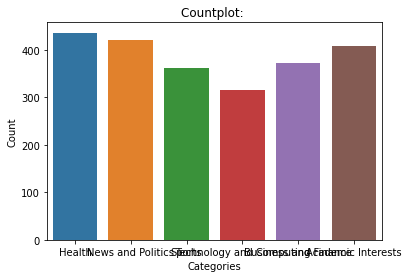

In [37]:
sns.countplot(x = 'target', data = df3)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Countplot: ')
plt.show()

In [38]:
df3.target.value_counts()

Health                      436
News and Politics           421
Academic Interests          407
Business and Finance        372
Sports                      361
Technology and Computing    315
Name: target, dtype: int64

#### Conclusion: Data is balanced but value counts are too low

## Combining different datasets

In [39]:
df4 = pd.read_csv('d4.csv')
df4.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [40]:
df5 = pd.read_csv('d5.csv')
df5.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [41]:
df6 = pd.read_csv('d6.csv')
df6.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [42]:
df7 = pd.read_csv('d7.csv')
df7.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [43]:
df8 = pd.read_csv('d8.csv')
df8.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [44]:
df9 = pd.read_csv('d9.csv')
df9.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [45]:
df10 = pd.read_csv('d10.csv')
df10.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [46]:
df11 = pd.read_csv('d11.csv')
df11.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)

In [47]:
df12 = pd.read_csv('d12.csv', nrows = 35001, encoding='ISO-8859-1')
df12.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text'}, inplace=True)
# df12 = df12.sample(n=35000, random_state=42)

In [48]:
df13 = pd.read_csv('d13.csv')
df13.rename(columns={'category': 'target', 'categories':'target', 'Category':'target','article':'text', 'Text':'text', 'Title':'target'}, inplace=True)
df13 = df13.sample(n=35001, random_state=42)

In [49]:
# this datset is prepared from Web Scraping 
df14 = pd.read_csv('scraped_dataset.csv')

#### 'df14' is scraped_dataset which contains scraped articles of different categories from different sources like TOI, Economic Times, etc.

In [50]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14], axis = 0, ignore_index = True)
df.target = df.target.str.lower()

In [51]:
df

,text,target
0,Musik zu machen liegt uns im Blut. Einfach Kra...,personal finance
1,Roohi’s trailer is haunting and hilarious at t...,family and relationships
2,2012 PLAYBOY JAZZ FESTIVAL FEATURES NEW ARTIST...,music and audio
3,FedEx Office Coupons & Promo Codes. FedEx Offi...,shopping
4,Selecting Words. 26) The Kumbh Mela is known f...,technology and computing
...,...,...
1137680,Pollywood diva Monica Gill is currently baskin...,hobbies and interests
1137681,Father of two<br /><br />Family car: Alto <br ...,hobbies and interests
1137682,Sad part is that you suffered for that defeat....,hobbies and interests
1137683,"Today, Sharma has a very serious assignment - ...",hobbies and interests


In [52]:
df.target = df.target.replace({'style and faishon':'style and fashion'})

In [53]:
df = df[df['target'] != 'arts and entertainment']
df

,text,target
0,Musik zu machen liegt uns im Blut. Einfach Kra...,personal finance
1,Roohi’s trailer is haunting and hilarious at t...,family and relationships
2,2012 PLAYBOY JAZZ FESTIVAL FEATURES NEW ARTIST...,music and audio
3,FedEx Office Coupons & Promo Codes. FedEx Offi...,shopping
4,Selecting Words. 26) The Kumbh Mela is known f...,technology and computing
...,...,...
1137680,Pollywood diva Monica Gill is currently baskin...,hobbies and interests
1137681,Father of two<br /><br />Family car: Alto <br ...,hobbies and interests
1137682,Sad part is that you suffered for that defeat....,hobbies and interests
1137683,"Today, Sharma has a very serious assignment - ...",hobbies and interests


In [54]:
print(df.isnull().sum())

text      18
target     0
dtype: int64


In [55]:
print(df.duplicated().sum())

21847


In [56]:
df.shape

(988174, 2)

In [57]:
def merge_rows(group):
    merged_text = ""
    rows_to_remove = []

    for i, text in enumerate(group['text']):
        text = str(text)
        if len(merged_text.split()) + len(text.split()) <= 150:
            merged_text += text + " "
            rows_to_remove.append(group.index[i])
        else:
            break

    if merged_text.strip():
        group.at[group.index[-1], 'text'] = merged_text.strip()

    group.drop(rows_to_remove, inplace=True)

    return group

df = df.groupby('target', group_keys=False).apply(merge_rows).reset_index(drop=True)

In [58]:
df.shape

(988100, 2)

In [59]:
df.dropna(subset=['text', 'target'], inplace=True)

In [60]:
df.drop_duplicates(subset='text', keep='first', inplace=True)

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
df

,text,target
0,The Hierarchy Problem. What is the Hierarchy P...,academic interests
1,Digging the Root Canal. Digging the Root Canal...,academic interests
2,Turning spit and data into treasure. By the ti...,academic interests
3,Plastics. Overview\nPlastic waste is choking o...,academic interests
4,New To Motorhomes. Just bought a motorhome or ...,academic interests
...,...,...
965541,\nJames Cameron’s long-awaited sequel Avatar: ...,video gaming
965542,\nBethesda’s Todd Howard says he expects every...,video gaming
965543,\nPokemon Scarlet and Violet just got their fi...,video gaming
965544,\nQuantic Dream founder David Cage says the st...,video gaming


In [63]:
df.target.unique()

array(['academic interests', 'arts and culture', 'automotive',
       'books and literature', 'business and finance', 'careers',
       'family and relationships', 'food and drink', 'health',
       'healthy living', 'hobbies and interests', 'home and garden',
       'movies', 'music and audio', 'news and politics',
       'personal finance', 'pets',
       'pharmaceuticals, conditions, and symptoms', 'real estate',
       'shopping', 'sports', 'style and fashion',
       'technology and computing', 'television', 'travel', 'video gaming'],
      dtype=object)

In [64]:
df.target.value_counts()

technology and computing                     104895
news and politics                             93555
academic interests                            69360
books and literature                          52122
automotive                                    51589
health                                        44567
arts and culture                              40729
business and finance                          40361
careers                                       38073
pharmaceuticals, conditions, and symptoms     35000
sports                                        31779
travel                                        29900
movies                                        28449
healthy living                                28207
style and fashion                             28158
food and drink                                27791
pets                                          26081
music and audio                               25703
real estate                                   25697
video gaming

In [65]:
count = df['target'].value_counts()
count.mean()

37136.38461538462

In [66]:
df.to_csv('TIL Dataset.csv', index = False)

### Creating dataset with contains 20000 samples per category

In [67]:
categories = df['target'].unique()
sampled_dfs = []

for category in categories:
    category_df = df[df['target'] == category]
    num_samples = min(20000, category_df.shape[0])
    sampled_df = category_df.sample(num_samples, random_state=42)
    sampled_dfs.append(sampled_df)

In [68]:
res_df = pd.concat(sampled_dfs, ignore_index = True)
res_df

,text,target
0,"Last summer my granddaughter, Brooke, played i...",academic interests
1,NEW DELHI: Uttar Pradesh Police Recruitment Bo...,academic interests
2,BELGAUM: Karnataka Higher Education minister ...,academic interests
3,Lincoln University has welcomed the governmen...,academic interests
4,NEW DELHI: The Uttar Pradesh Public Service Co...,academic interests
...,...,...
517707,\nDeath Stranding 2 has been announced at The ...,video gaming
517708,"Raj Kundra dons multiple hats, but one thing t...",video gaming
517709,"\nMario + Rabbids Sparks of Hope, one of the b...",video gaming
517710,Ahmedabad: A 38-year-old man from Adalaj who m...,video gaming


In [69]:
res_df.target.value_counts()

academic interests                           20000
arts and culture                             20000
travel                                       20000
technology and computing                     20000
style and fashion                            20000
sports                                       20000
shopping                                     20000
real estate                                  20000
pharmaceuticals, conditions, and symptoms    20000
pets                                         20000
personal finance                             20000
news and politics                            20000
music and audio                              20000
movies                                       20000
home and garden                              20000
healthy living                               20000
health                                       20000
food and drink                               20000
careers                                      20000
business and finance           

In [70]:
res_df.to_csv('res_df.csv', index = False)

In [71]:
res_df.iloc[23412].text

"Art and culture department provides grants to educational institutions for imparting cultural education by conducting regular classes in music, dance etc. The grants are available for the purchase of musical equipment, remuneration of music teachers, accompanists, maintenance and TA to music teachers and accompanists. Eligibility criteria Non-government or aided high schools can apply to art and culture department for the grants Schools are at liberty to select the field of their choice-vocal, instrumental, classical dance, western music etc Pattern of assistance Grant of Rs 20,000 per school shall be sanctioned and paid towards purchase of musical equipment as initial grant to start classes A senior artist or musician (senior teacher) will be paid up to Rs 7,000 per month as remuneration Artist or musician (accompanist) will be paid up to Rs 5,000 per month as remuneration The school has to present utilization certificate for the year ending and the unutilized amount is to be remitte